In [377]:
# Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data scaling
from sklearn.preprocessing import MinMaxScaler

# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split

# Tensorflow sequential models
import tensorflow as tf
from tensorflow import keras
from keras import backend as clear
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.optimizers import SGD
from keras.optimizers import Adam

# Functions for evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [378]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 6550101652481694877
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14328594432
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 15301176557965870122
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [379]:
device_name = tf.test.gpu_device_name()
if len(device_name)>0:
    print(f'GPU has been found... device name is{device_name}')
else:
    print('No GPU has been found...')

GPU has been found... device name is/device:GPU:0


In [380]:
#load data(sometimes need to use "/")
#df = pd.read_csv('D:/pythonData/python_demo_data/Stress.csv')
# Colab
df = pd.read_csv('/content/Titanic_demo_2.csv')
df

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,3,22.0,1,0,7.2500,0,1,0,0,1,0
1,1,38.0,1,0,71.2833,1,0,1,0,0,1
2,3,26.0,0,0,7.9250,1,0,0,0,1,1
3,1,35.0,1,0,53.1000,1,0,0,0,1,1
4,3,35.0,0,0,8.0500,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1303,3,30.0,0,0,8.0500,0,1,0,0,1,1
1304,1,39.0,0,0,108.9000,1,0,1,0,0,0
1305,3,30.0,0,0,7.2500,0,1,0,0,1,0
1306,3,30.0,0,0,8.0500,0,1,0,0,1,0


# 1. Quick overview to get a grasp of the data set

In [381]:
# Change data type
df.iloc[:,1]=df.iloc[:,1].astype(int)
df.iloc[:,2]=df.iloc[:,2].astype(int)
df.iloc[:,4]=df.iloc[:,4].astype(int)
df.iloc[:,5]=df.iloc[:,5].astype(int)
df.iloc[:,6]=df.iloc[:,6].astype(int)
df.iloc[:,7]=df.iloc[:,7].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Pclass      1308 non-null   int64
 1   Age         1308 non-null   int64
 2   SibSp       1308 non-null   int64
 3   Parch       1308 non-null   int64
 4   Fare        1308 non-null   int64
 5   Sex_female  1308 non-null   int64
 6   Sex_male    1308 non-null   int64
 7   Embarked_C  1308 non-null   int64
 8   Embarked_Q  1308 non-null   int64
 9   Embarked_S  1308 non-null   int64
 10  Survived    1308 non-null   int64
dtypes: int64(11)
memory usage: 112.5 KB


<ipython-input-381-8f678924044f>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,1]=df.iloc[:,1].astype(int)
<ipython-input-381-8f678924044f>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,4]=df.iloc[:,4].astype(int)


In [382]:
# 1.3 Add include='all' to select all columns
df.describe(include='all')

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
count,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000
mean,2.294343,30.113150,0.499235,0.385321,32.869266,0.356269,0.643731,0.207187,0.094801,0.698012,0.372324
std,0.837929,12.403175,1.041965,0.865826,51.767036,0.479079,0.479079,0.405445,0.293052,0.459296,0.483609
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,30.000000,0.000000,0.000000,14.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [383]:
# 1.4 Using value_counts function to count frequency in categorical column
print(df.iloc[:,3].value_counts(sort=True))
print('+-----------------------+')

0    1001
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: Parch, dtype: int64
+-----------------------+


# 2. Data preprocessing

In [384]:
# Using pd.get_dummies function to generate dummies
dummied_df=pd.get_dummies(df,columns=['Survived'])
dummied_df

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived_0,Survived_1
0,3,22,1,0,7,0,1,0,0,1,1,0
1,1,38,1,0,71,1,0,1,0,0,0,1
2,3,26,0,0,7,1,0,0,0,1,0,1
3,1,35,1,0,53,1,0,0,0,1,0,1
4,3,35,0,0,8,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1303,3,30,0,0,8,0,1,0,0,1,0,1
1304,1,39,0,0,108,1,0,1,0,0,1,0
1305,3,30,0,0,7,0,1,0,0,1,1,0
1306,3,30,0,0,8,0,1,0,0,1,1,0


In [385]:
# Convert Y into dummies
Y=dummied_df.iloc[:,[10,11]].copy()
dummied_Y=Y.to_numpy()
dummied_Y

array([[1, 0],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

# 3. Data scaling with minimax technique

In [386]:
#minimax scaling
MMscaler=MinMaxScaler(feature_range=(0,1))
scaling=MMscaler.fit_transform(dummied_df)
scaled_data=pd.DataFrame(data=scaling)
scaled_data.columns=dummied_df.columns
scaled_data.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived_0,Survived_1
0,1.0,0.265823,0.125,0.0,0.013672,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.468354,0.125,0.0,0.138672,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.316456,0.000,0.0,0.013672,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.430380,0.125,0.0,0.103516,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1.0,0.430380,0.000,0.0,0.015625,0.0,1.0,0.0,0.0,1.0,1.0,0.0


# 4. Set  Independent variable(X) 

In [387]:
#set x (make prediction) with minimax
x=scaled_data[['Pclass','Age','SibSp','Parch','Fare','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S']].copy()
x

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.265823,0.125,0.000000,0.013672,0.0,1.0,0.0,0.0,1.0
1,0.0,0.468354,0.125,0.000000,0.138672,1.0,0.0,1.0,0.0,0.0
2,1.0,0.316456,0.000,0.000000,0.013672,1.0,0.0,0.0,0.0,1.0
3,0.0,0.430380,0.125,0.000000,0.103516,1.0,0.0,0.0,0.0,1.0
4,1.0,0.430380,0.000,0.000000,0.015625,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
1303,1.0,0.367089,0.000,0.000000,0.015625,0.0,1.0,0.0,0.0,1.0
1304,0.0,0.481013,0.000,0.000000,0.210938,1.0,0.0,1.0,0.0,0.0
1305,1.0,0.367089,0.000,0.000000,0.013672,0.0,1.0,0.0,0.0,1.0
1306,1.0,0.367089,0.000,0.000000,0.015625,0.0,1.0,0.0,0.0,1.0


# 5. Spilt the data into train & test set

In [388]:
#prepare dataset with scaling
#Split the data (split into 80% training data & 20% testing data) (lock seed)
x_train,x_test,y_train,y_test=train_test_split(x,dummied_Y,test_size=0.2,random_state=444)

In [389]:
print('training:',len(y_train))
print('+-----------------------+')
print('testing:',len(y_test))

training: 1046
+-----------------------+
testing: 262


In [390]:
x_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
800,0.5,0.417722,0.0,0.0,0.025391,0.0,1.0,0.0,0.0,1.0
209,0.0,0.493671,0.0,0.0,0.060547,0.0,1.0,1.0,0.0,0.0
428,1.0,0.367089,0.0,0.0,0.013672,0.0,1.0,0.0,1.0,0.0
1230,0.5,0.215190,0.0,0.0,0.019531,0.0,1.0,0.0,0.0,1.0
1235,1.0,0.189873,0.0,0.0,0.013672,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
948,1.0,0.303797,0.0,0.0,0.013672,0.0,1.0,0.0,0.0,1.0
67,1.0,0.227848,0.0,0.0,0.015625,0.0,1.0,0.0,0.0,1.0
1288,1.0,0.265823,0.0,0.0,0.013672,0.0,1.0,0.0,0.0,1.0
791,0.5,0.189873,0.0,0.0,0.050781,0.0,1.0,0.0,0.0,1.0


# 6. Creating Net 

In [391]:
# Quick recap: Total of 12 features in the data set
x.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.265823,0.125,0.0,0.013672,0.0,1.0,0.0,0.0,1.0
1,0.0,0.468354,0.125,0.0,0.138672,1.0,0.0,1.0,0.0,0.0
2,1.0,0.316456,0.000,0.0,0.013672,1.0,0.0,0.0,0.0,1.0
3,0.0,0.430380,0.125,0.0,0.103516,1.0,0.0,0.0,0.0,1.0
4,1.0,0.430380,0.000,0.0,0.015625,0.0,1.0,0.0,0.0,1.0


In [392]:
# Tips: Using shape to call the amount of features in the data set 
input_features=x.shape[1]
print('Amount of features:',input_features)

Amount of features: 10


# Sequential style coding for creating net

Note: The following code demonstrate the most common style for creating net

In [393]:
# Some self define functions for building deep neural networks
def dense_generator(model_name,layers,last_layer_neurons,activation_fun='relu'):
    n=last_layer_neurons
    neurons=n
    for i in range(0,layers):
        neurons=neurons*2
        model_name.add(Dense(units=neurons, activation=activation_fun))

In [532]:

# with tf.device(device_name):
# 6.1 Create the model
clear.clear_session()
model=Sequential()

# 6.2 Add input layer & first hidden layer
model.add(Dense(units=6, input_dim=x_train.shape[1], activation='linear'))

# 6.3 Add 5 dense layers
dense_generator(model,5,6)

# 6.4 Add dropout layer
model.add(Dropout(rate=0.1)) 

# 6.5 Add 2 more dense layers
dense_generator(model,2,192)

# 6.6 Add regularization layer optional
#model.add(BatchNormalization())

# 6.7 Add output softmax layer
model.add(Dense(units=2, activation='softmax'))#此處修改成兩層，因為只會顯示是否存活

# 6.8 Compile the defined Net
opt=Adam(learning_rate=0.001,beta_1=0.5) 
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Finally check the model 
model.summary()

'''
# 6.1 Create the model
clear.clear_session()
model=Sequential()

# 6.2 Add input layer & first hidden layer
model.add(Dense(units=24, input_dim=x_train.shape[1], activation='relu'))

# 6.3 Add second hidden layer
model.add(Dense(units=48, activation='relu'))

# 6.7 Add output softmax layer
model.add(Dense(units=2, activation='softmax'))#此處修改成兩層，因為只會顯示是否存活

# 6.8 Compile the defined Net
opt=Adam(learning_rate=0.001,beta_1=0.5)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Finally check the model 
model.summary()
'''

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 66        
                                                                 
 dense_1 (Dense)             (None, 12)                84        
                                                                 
 dense_2 (Dense)             (None, 24)                312       
                                                                 
 dense_3 (Dense)             (None, 48)                1200      
                                                                 
 dense_4 (Dense)             (None, 96)                4704      
                                                                 
 dense_5 (Dense)             (None, 192)               18624     
                                                                 
 dropout (Dropout)           (None, 192)               0

"\n# 6.1 Create the model\nclear.clear_session()\nmodel=Sequential()\n\n# 6.2 Add input layer & first hidden layer\nmodel.add(Dense(units=24, input_dim=x_train.shape[1], activation='relu'))\n\n# 6.3 Add second hidden layer\nmodel.add(Dense(units=48, activation='relu'))\n\n# 6.7 Add output softmax layer\nmodel.add(Dense(units=2, activation='softmax'))#此處修改成兩層，因為只會顯示是否存活\n\n# 6.8 Compile the defined Net\nopt=Adam(learning_rate=0.001,beta_1=0.5)\nmodel.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])\n\n# Finally check the model \nmodel.summary()\n"

Note: Remember to clear the session or else some of the left neurans may cause trouble while fitting

# 7. Fit the model

# Note: The validation set should be split manually

In [533]:
# Important
x_training,x_validation,y_training,y_validation=train_test_split(x_train,y_train,test_size=0.2,random_state=24)

# 7.1 Store in the history for more useful information
history=model.fit(x_training, y_training, epochs=300, batch_size=64,verbose=1,validation_data=(x_validation, y_validation))

Epoch 1/300
14/14 [==============================] - 1s 22ms/step - loss: 0.6170 - accuracy: 0.6782 - val_loss: 0.5641 - val_accuracy: 0.7238
Epoch 2/300
14/14 [==============================] - 0s 6ms/step - loss: 0.5897 - accuracy: 0.7321 - val_loss: 0.5686 - val_accuracy: 0.7429
Epoch 3/300
14/14 [==============================] - 0s 5ms/step - loss: 0.5780 - accuracy: 0.7440 - val_loss: 0.5667 - val_accuracy: 0.7381
Epoch 4/300
14/14 [==============================] - 0s 6ms/step - loss: 0.5620 - accuracy: 0.7392 - val_loss: 0.5590 - val_accuracy: 0.7429
Epoch 5/300
14/14 [==============================] - 0s 5ms/step - loss: 0.5547 - accuracy: 0.7392 - val_loss: 0.6061 - val_accuracy: 0.7048
Epoch 6/300
14/14 [==============================] - 0s 6ms/step - loss: 0.5570 - accuracy: 0.7488 - val_loss: 0.5777 - val_accuracy: 0.7333
Epoch 7/300
14/14 [==============================] - 0s 6ms/step - loss: 0.5342 - accuracy: 0.7656 - val_loss: 0.5600 - val_accuracy: 0.7476
Epoch 8/300


In [534]:
# Check the dictionary keys
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

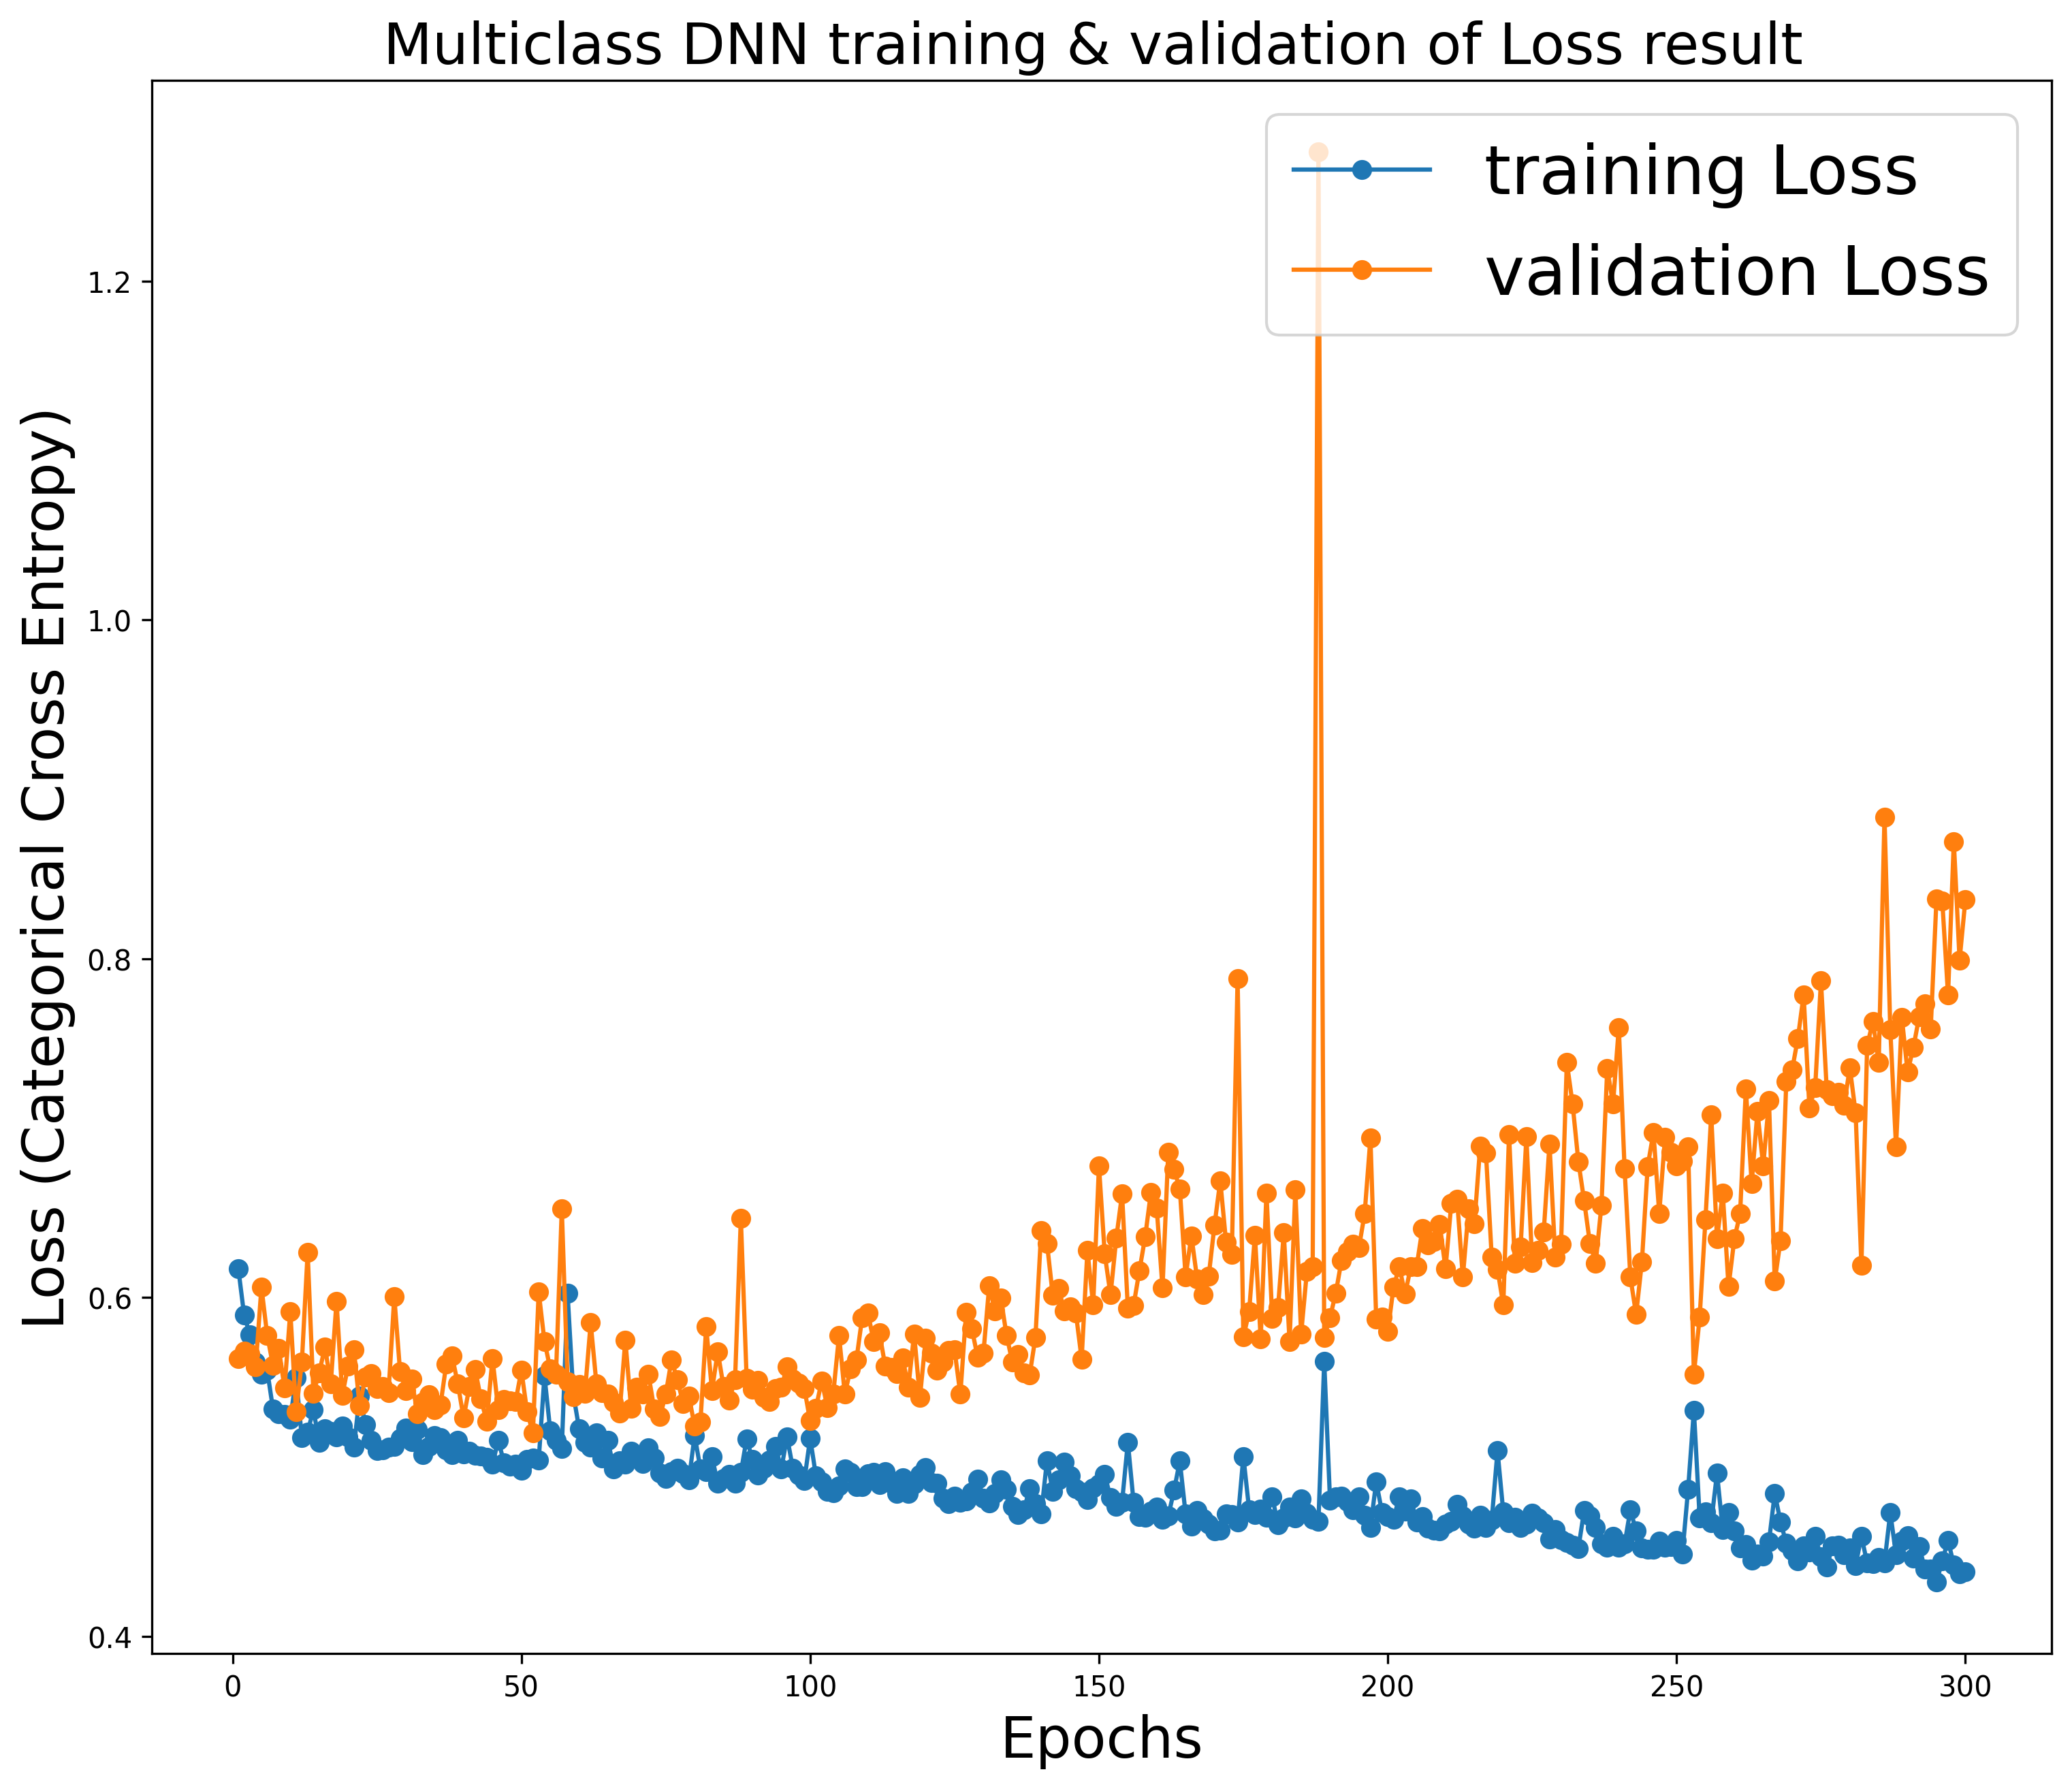

In [535]:
# 7.2 Plot the history of training and validation
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Categorical Cross Entropy)',fontsize=20)
plt.title('Multiclass DNN training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='o',label='training Loss')
plt.plot(epochs, val_loss_values,marker='o',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

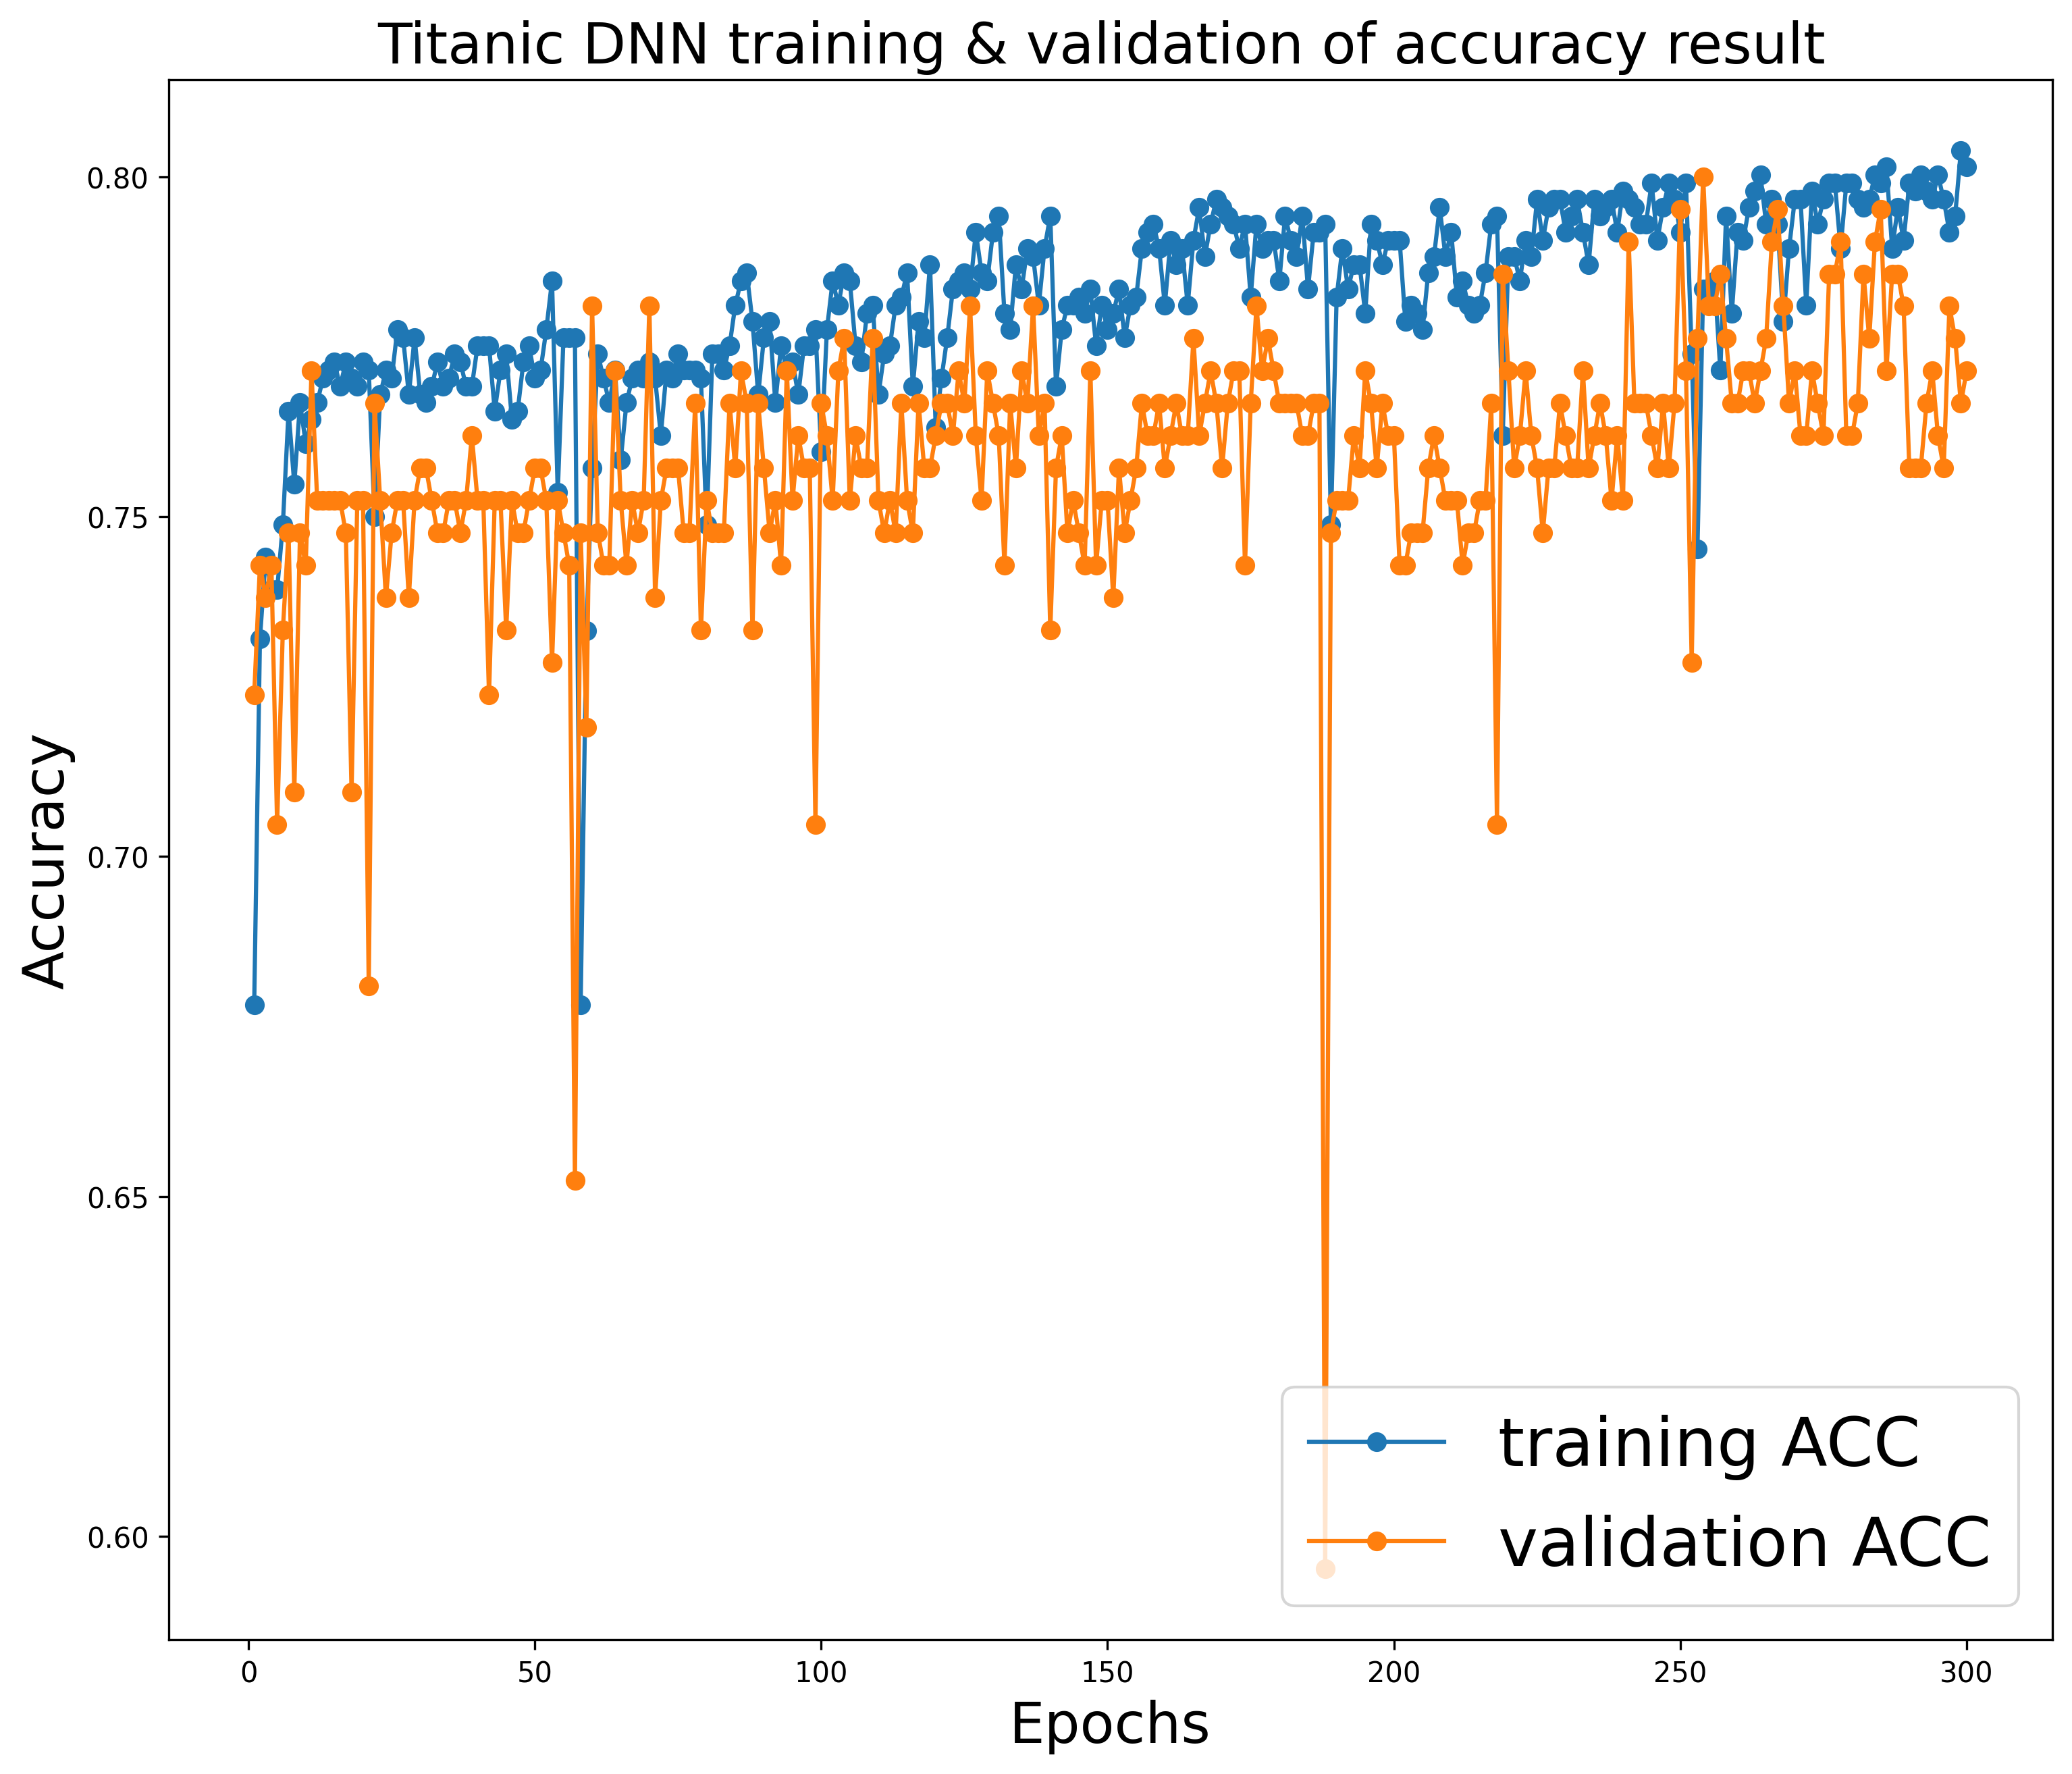

In [536]:
# 7.2 Plot the history of training and validation
training_acc_values=modeling_result['accuracy']
val_acc_values=modeling_result['val_accuracy']
epochs=range(1,len(training_acc_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.title('Titanic DNN training & validation of accuracy result ',fontsize=20)

plt.plot(epochs, training_acc_values,marker='o',label='training ACC')
plt.plot(epochs, val_acc_values,marker='o',label='validation ACC')
plt.legend(loc=4,fontsize=24)
plt.show()

In [537]:
# 7.3 Save the trained model
#model.save('D:/data_analysis/PyExport/Multiclass_ANN_trained_model.h5')
# Colab
model.save('Multiclass_ANN_trained_model.h5')
print('Model has been saved...')

Model has been saved...


In [538]:
# 7.4 Restore the saved model for testing
#ANN_model=keras.models.load_model('D:/data_analysis/PyExport/Multiclass_ANN_trained_model.h5')
# Colab
ANN_model=keras.models.load_model('Multiclass_ANN_trained_model.h5')
print('Model successfully loaded...')

Model successfully loaded...


# 8. Testing

In [539]:
# 8.1 Make prediction 
prediction=ANN_model.predict_on_batch(x_test)
prediction

array([[8.67729127e-01, 1.32270932e-01],
       [8.88078094e-01, 1.11921936e-01],
       [9.99764025e-01, 2.35954634e-04],
       [8.83646667e-01, 1.16353363e-01],
       [2.77272314e-02, 9.72272754e-01],
       [9.99999285e-01, 7.09527626e-07],
       [7.40869820e-01, 2.59130210e-01],
       [8.64741147e-01, 1.35258928e-01],
       [9.99998569e-01, 1.37148811e-06],
       [4.36316105e-03, 9.95636880e-01],
       [1.95118278e-01, 8.04881752e-01],
       [8.62922966e-01, 1.37077048e-01],
       [6.67574406e-01, 3.32425535e-01],
       [5.75581849e-01, 4.24418181e-01],
       [1.30725530e-04, 9.99869227e-01],
       [7.84562111e-01, 2.15437904e-01],
       [6.88965440e-01, 3.11034590e-01],
       [9.27994907e-01, 7.20050782e-02],
       [8.41516793e-01, 1.58483207e-01],
       [7.45024145e-01, 2.54975855e-01],
       [8.68863106e-01, 1.31136939e-01],
       [8.61587763e-01, 1.38412297e-01],
       [2.24190816e-01, 7.75809169e-01],
       [3.17606479e-02, 9.68239367e-01],
       [8.642399

In [540]:
df_prediction=pd.DataFrame(prediction)
df_prediction.columns=['Survived_0','Survived_1']
df_prediction

,Survived_0,Survived_1
0,0.867729,0.132271
1,0.888078,0.111922
2,0.999764,0.000236
3,0.883647,0.116353
4,0.027727,0.972273
...,...,...
257,0.005264,0.994736
258,0.856364,0.143636
259,0.008283,0.991717
260,0.007843,0.992157


In [541]:
# Convert each sample final prediction according to the class with the largest likelihood
final_prediction=[]
for i in range(0,len(prediction)):
    origin=prediction[i]
    max_idx=np.argmax(origin)
    convert=np.zeros_like(origin)
    convert[max_idx]=1
    final_prediction.append(convert)

In [542]:
df_final_prediction=pd.DataFrame(final_prediction)
df_final_prediction.columns=['Survived_0','Survived_1']
df_final_prediction=df_final_prediction.astype(int)
df_final_prediction

,Survived_0,Survived_1
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
257,0,1
258,1,0
259,0,1
260,0,1


In [543]:
fpred=df_final_prediction.to_numpy()
reverted = np.argmax(fpred, axis=1)
reverted

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0])

In [544]:
y_test_reverted=np.argmax(y_test, axis=1)
y_test_reverted

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0])

In [545]:
# Calculating the mertics at once
testing_acc=accuracy_score(y_test,fpred)
testing_f1s=f1_score(y_test,fpred,average=None)
testing_pre=precision_score(y_test,fpred,average=None)
testing_sen=recall_score(y_test,fpred,average=None)
testing_cm=confusion_matrix(y_test_reverted,reverted)
print('Testing result:')
print('Testing ACC:',testing_acc)
print('Testing f1s:',testing_f1s)
print('Testing pre:',testing_pre)
print('Testing sen:',testing_sen)
print('')
print('Testing confusion matrix:')
print(testing_cm)

Testing result:
Testing ACC: 0.7862595419847328
Testing f1s: [0.84444444 0.65853659]
Testing pre: [0.79166667 0.77142857]
Testing sen: [0.9047619  0.57446809]

Testing confusion matrix:
[[152  16]
 [ 40  54]]
